<a href="https://colab.research.google.com/github/Uliana313/NM/blob/main/%D0%9B%D0%A0_7_%D0%A1%D0%B8%D0%B4%D0%BE%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_27%D0%B2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перша інтерполяційна формула Ньютона

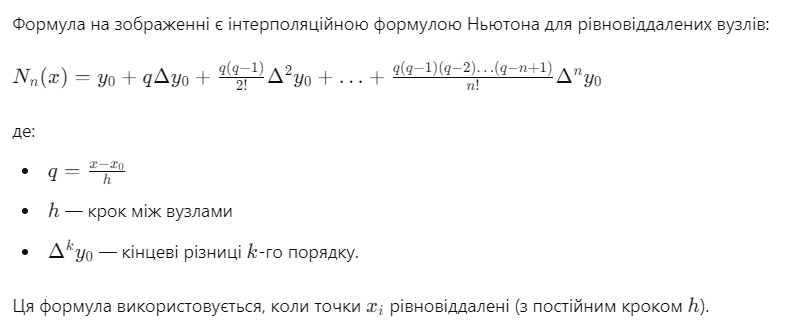

In [5]:
import numpy as np
from math import factorial

# задані точки
x = np.array([1.34, 1.345, 1.35, 1.355, 1.36, 1.365])  # задаємо x генератором списків
y = np.array([0.963, 0.968, 0.972, 0.976, 0.979, 0.983])

print('x =', x)
print('y =', y)

# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.1
x1 = 0.1 #Замінити точку вашого варіанту (точка на початку відрізку)
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

x = [1.34  1.345 1.35  1.355 1.36  1.365]
y = [0.963 0.968 0.972 0.976 0.979 0.983]
f(0.1) = -41012364.65300436


Друга інтерполяційна формула Ньютона (інтерполяція назад)

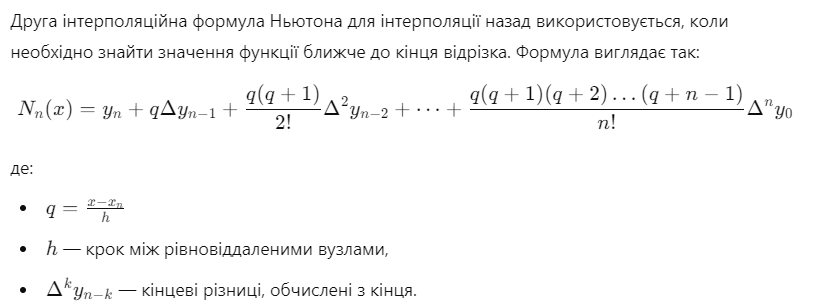

In [6]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# задані точки
x = np.array([1.34, 1.345, 1.35, 1.355, 1.36, 1.365])
y = np.array([0.963, 0.968, 0.972, 0.976, 0.979, 0.983])

# ----------------------- Інтерполяція вперед -----------------------
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[0]) / h
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)
    return ans

# ----------------------- Інтерполяція назад -----------------------
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[-1]) / h
    ans = delta_y[-1, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)
    return ans

# ----------------------- Обчислення двох точок -----------------------
x1 = 1.341
y1 = newton_forward_interpolation(x, y, x1)

x2 = 1.364
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")


f(1.341) = 0.9643228799999999
f(1.364) = 0.9817955200000001


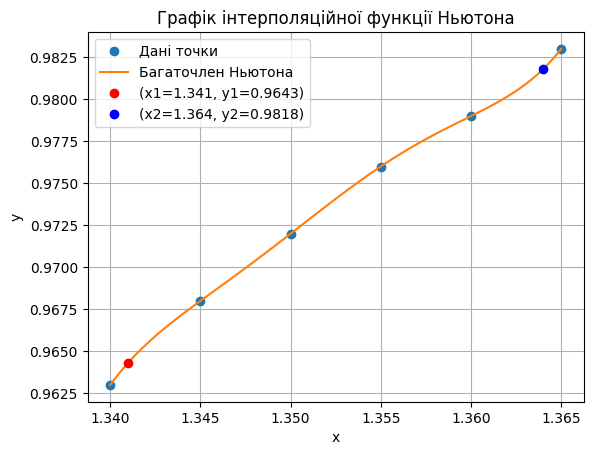

In [7]:
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)

for i in range(len(xx)):
    if xx[i] <= x[len(x)//2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='Багаточлен Ньютона')
plt.plot(x1, y1, 'ro', label=f'(x1={x1}, y1={y1:.4f})')
plt.plot(x2, y2, 'bo', label=f'(x2={x2}, y2={y2:.4f})')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()